In [103]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [104]:
# 데이터 로드
data = pd.read_csv('winequality-red.csv')

In [105]:
print(data.shape)
print(data.head())
print(data.isnull().sum())

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

In [106]:
# 데이터 스케일링
features = data.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [107]:
# KMeans 클러스터 분석
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [108]:
# 클러스터 분석 결과  데이터 테이블에 추가
data['Cluster'] = kmeans.labels_

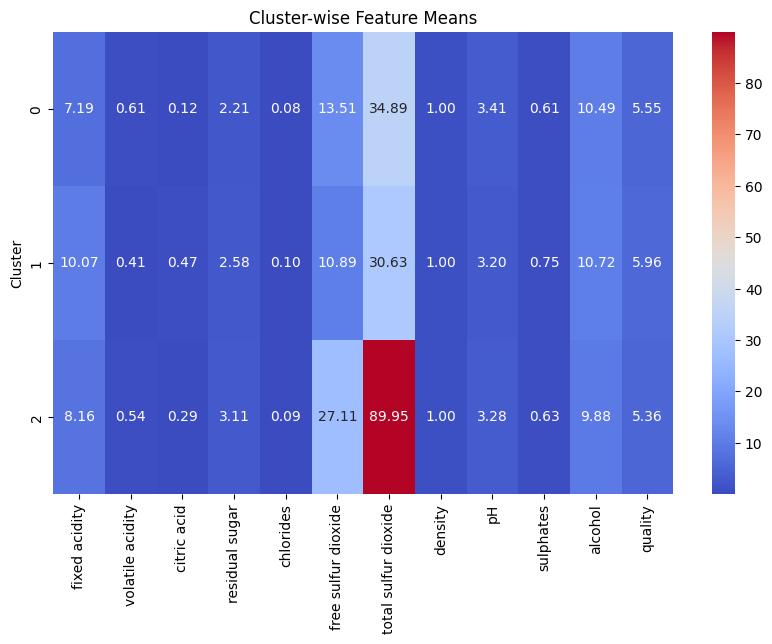

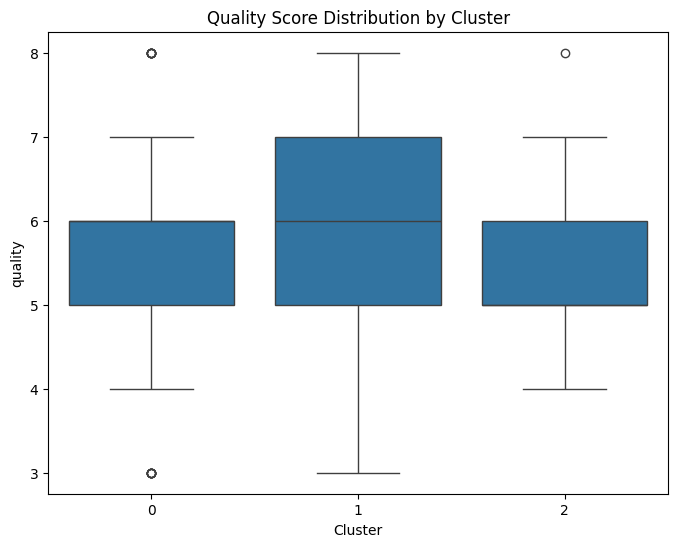

In [109]:
# 클러스터별 평균값 계산
cluster_means = data.groupby('Cluster').mean()

# 평균값 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster-wise Feature Means')
plt.show()

# 3. 클러스터별 품질 점수 분포 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='quality', data=data)
plt.title('Quality Score Distribution by Cluster')
plt.show()


In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
feature_pca = pca.fit_transform(scaled_features)
data_pca = pd.DataFrame(data=feature_pca, columns=['PCA_1', 'PCA_2'])
data_pca['PCA_Cluster'] = data['Cluster']

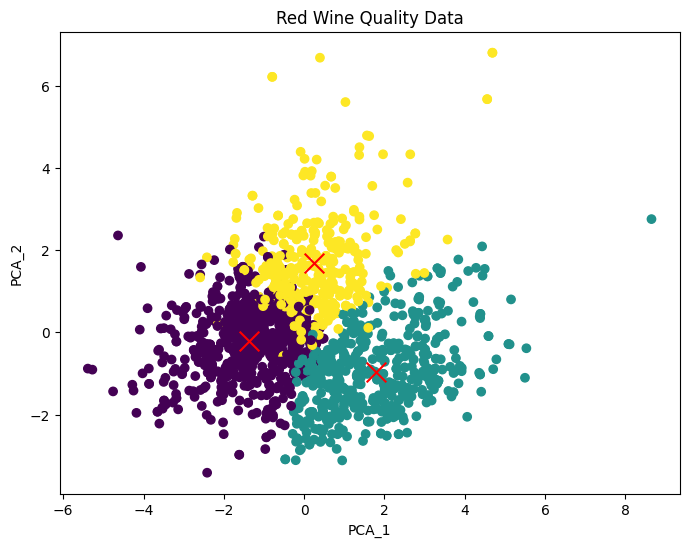

In [137]:
# 군집 분석 시각화
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca['PCA_1'], data_pca['PCA_2'], c=data_pca['PCA_Cluster'])
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, marker='x', color = 'red')
plt.title("Red Wine Quality Data")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()